
### Examining racial discrimination in the US job market

#### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

#### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes.

#### Exercise
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Discuss statistical significance.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('white')

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
print(sum(data[data.race=='b'].call))
# number of callbacks for white-sounding names
print(sum(data[data.race=='w'].call))
# difference
sum(data[data.race=='w'].call) - sum(data[data.race=='b'].call)

157.0
235.0


78.0

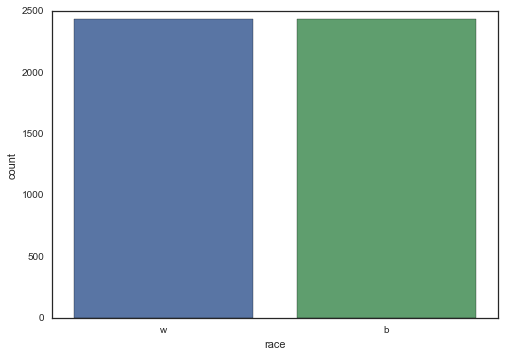

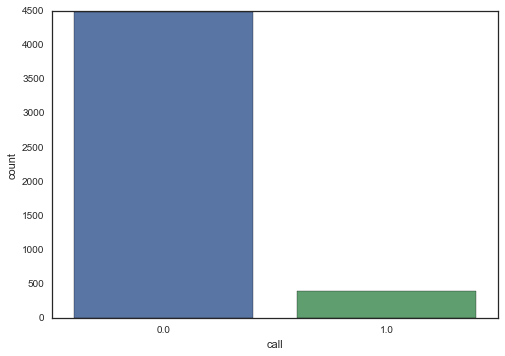

2435
2435


In [4]:
sns.countplot(data.race)
plt.show()
sns.countplot(data.call)
plt.show()
print(sum(data.race == 'w'))
print(sum(data.race == 'b'))

In [5]:
# 1. A permutation test to see whether the difference can be based on coincidence. 
# No, CLT does not apply, there are only 2 values, not multiple values from which you extract a mean and std.
# We can use the permuted distribution which will be normally distributed and CLT will apply there. (more than 30 samples)
# On the other hand we could see it as a proportion of callbacks for two populations with n=2435 and k=#calls
# In that way CLT does apply. n>30, hence assume normal distribution. So do Z-test.
# Can't find a package that made a Z-test, hence I'll be using the T-test instead (gives similar results with many samples)

# 2. H0: Race has no effect on callbask. H1: race has an effect on callback.
# The question is whether race has a significant impact, not whether being black has a significant impact,
# hence test is two-sided.

### Permutation

In [6]:
from numpy.random import permutation

def permutate(X):
    new_array = permutation(X)
    return sum(new_array[0:2435]) - sum(new_array[2435::]) # calculate difference between first group and second

difference = []                            
for i in range(0,100000):
    difference.append(permutate(data.call))

[-38.  38.]


/Users/ro.d.bruijn/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


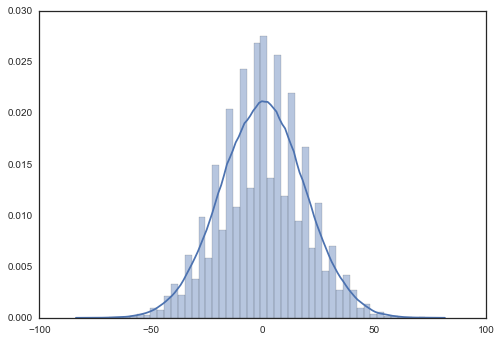

In [7]:
# Confidence interval 95%, 
# our result is very much outside the confidence interval of the difference between two groups
print(np.percentile(difference, [2.5, 97.5]))
sns.distplot(difference) # permuted data, normally distributed (CLT applies on this)

In [8]:
# Margin of error with Z-table
# Critical value is 1.96 in the Z-statistic for 0.95% (more than 30 samples and not skewed, hence normally distributed)
print(1.96 * np.std(difference)) # hence our value is outside the margin of error
# margin of error is the difference between the border of the confidence interval and the mean,
# which is 0 in this case, hence margin of error that calculated that way is 38.
np.percentile(difference, [2.5, 97.5])[1] - np.mean(difference)

37.0668740963


37.969659999999998

In [9]:
diff = sum(data[data.race=='w'].call) - sum(data[data.race=='b'].call)
times = sum(difference > diff) + sum(difference < -diff) # times the difference is bigger than the found difference
print(times)
print(times / 100000) # p-value, hence clearly significant

0
0.0


In [10]:
# Alle measurements lead to the conclusion that it's very unlikely that our value would come from the permuted distribution.
# Therefore race is concluded to have an effect on callback.

### T-test

In [11]:
nw = sum(data.race == 'w')
nb = sum(data.race == 'b')
kw = sum(data[data.race=='w'].call)
kb = sum(data[data.race=='b'].call)
pw = kw/nw
pb = kb/nb
pw - pb # difference in means

0.032032854209445585

In [12]:
# You should actually use the Z-test, since it's normally distributed and over 30 samples, 
# but T-test gives similar results.
from scipy.stats import ttest_ind

ttest_ind(data[data.race=='w'].call, data[data.race=='b'].call) # p-value clearly significant

Ttest_indResult(statistic=4.1147052908617514, pvalue=3.9408021031288859e-05)

In [13]:
# 95% confidence interval
print((pw - pb) - 1.96 * np.sqrt(((pw*(1-pw))/nw) + ((pb*(1-pb))/nb))) # lower limit
print((pw - pb) + 1.96 * np.sqrt(((pw*(1-pw))/nw) + ((pb*(1-pb))/nb))) # upper limit
# No difference: 0, lies outside the confidence interval, hence race seems to have an effect

0.0167774478596
0.0472882605593


In [14]:
# margin of error
(pw - pb) + 1.96 * np.sqrt(((pw*(1-pw))/nw) + ((pb*(1-pb))/nb)) - (pw - pb)
# Our mean is 0.03, hence outside the margin of error, if the true mean would be 0.

0.015255406349886438

In [15]:
# Also from this calculation it's clear that it's very likely that race has an effect on callback.